In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (4).zip to archive (4).zip


In [ ]:
import zipfile
import os

# Replace with your actual zip filename if different
zip_filename = 'archive (4).zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

# List extracted files to find the CSV
os.listdir()


['.config', 'student_habits_performance.csv', 'archive (4).zip', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('student_habits_performance.csv')
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop 'student_id' as it's not useful for prediction
df = df.drop('student_id', axis=1)

# List of categorical columns
categorical_cols = [
    'gender', 'diet_quality', 'parental_education_level',
    'internet_quality', 'mental_health_rating',
    'part_time_job', 'extracurricular_participation'
]

# Label encode categorical columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,7,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,7,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,0,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,0,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,0,0,66.4


In [ ]:
X = df.drop('exam_score', axis=1)
y = df['exam_score']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()
xgb = XGBRegressor(random_state=42, verbosity=0)

# Ensemble
ensemble = VotingRegressor([
    ('lr', lr),
    ('rf', rf),
    ('knn', knn),
    ('xgb', xgb)
])

# Fit ensemble
ensemble.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...))])

In [ ]:
models = {'Linear Regression': lr, 'Random Forest': rf, 'KNN': knn, 'XGBoost': xgb}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, pred))
    print(f'{name} RMSE: {score:.2f}')


Linear Regression RMSE: 5.14
Random Forest RMSE: 6.25
KNN RMSE: 10.77
XGBoost RMSE: 6.32


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 6. Train, predict, and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2 (Accuracy)': r2
    })

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE         MSE  R2 (Accuracy)
0  Linear Regression  4.169262   26.413469       0.896995
1      Random Forest  4.995520   39.103712       0.847507
2                KNN  8.453200  115.904908       0.548004
3            XGBoost  5.135003   39.988722       0.844055


<ipython-input-17-7ba46b77a290>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
<ipython-input-17-7ba46b77a290>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
<ipython-input-17-7ba46b77a290>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 (Accuracy)', data=results_df, palette='viridis')


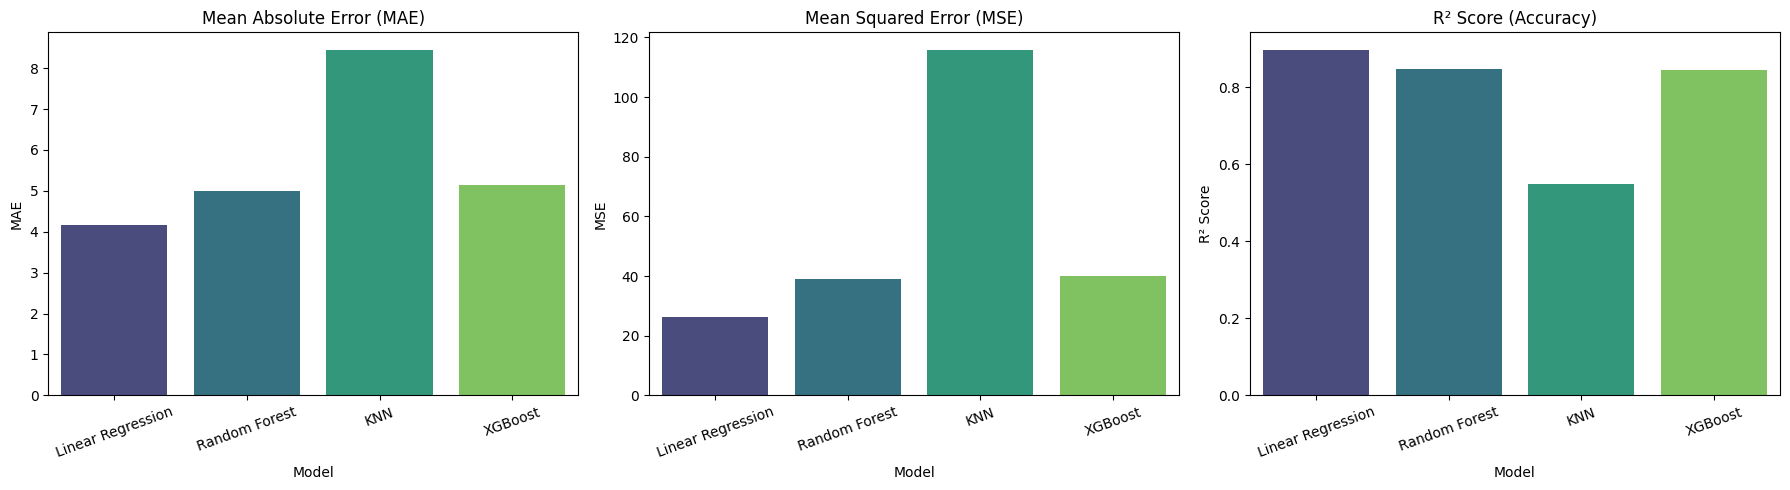

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure results_df is available (from previous code)
# If not, rerun the evaluation block that creates results_df

plt.figure(figsize=(18, 5))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=20)

# MSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=20)

# R2 Score Plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2 (Accuracy)', data=results_df, palette='viridis')
plt.title('R² Score (Accuracy)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load data
df = pd.read_csv('student_habits_performance.csv')
df = df.drop('student_id', axis=1)

categorical_cols = [
    'gender', 'diet_quality', 'parental_education_level',
    'internet_quality', 'mental_health_rating',
    'part_time_job', 'extracurricular_participation'
]

X = df.drop('exam_score', axis=1)
y = df['exam_score']

# Remove outliers using IQR for each numerical column
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
        df = df[mask]
    return df

numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
df_no_out = remove_outliers(df, numerical_cols)
X = df_no_out.drop('exam_score', axis=1)
y = df_no_out['exam_score']

# Feature importance from Random Forest
rf = RandomForestRegressor(random_state=42)
X_encoded = pd.get_dummies(X, drop_first=True)
rf.fit(X_encoded, y)
importances = rf.feature_importances_
feature_names = X_encoded.columns
imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False)
top_features = imp_df['feature'].tolist()[:6]  # Use top 6 features

# Only use top features
X_encoded = X_encoded[top_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Try both scalers
for scaler in [MinMaxScaler(), StandardScaler()]:
    pipe = Pipeline([
        ('scaler', scaler),
        ('knn', KNeighborsRegressor())
    ])
    param_grid = {
        'knn__n_neighbors': list(range(1, 31)),
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan', 'minkowski']
    }
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train, y_train)
    print(f"Scaler: {scaler}")
    print("Best KNN parameters:", grid_search.best_params_)
    print("Best KNN CV R2 score:", grid_search.best_score_)

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"KNN (Tuned) MAE: {mae:.4f}")
    print(f"KNN (Tuned) MSE: {mse:.4f}")
    print(f"KNN (Tuned) R2: {r2:.4f}")
    print("-" * 40)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Scaler: MinMaxScaler()
Best KNN parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best KNN CV R2 score: 0.7647459686413095
KNN (Tuned) MAE: 6.1200
KNN (Tuned) MSE: 63.2987
KNN (Tuned) R2: 0.7675
----------------------------------------
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Scaler: StandardScaler()
Best KNN parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best KNN CV R2 score: 0.8081487131501452
KNN (Tuned) MAE: 5.8718
KNN (Tuned) MSE: 54.8546
KNN (Tuned) R2: 0.7985
----------------------------------------


In [ ]:
import os
print(os.listdir())


['.config', 'sample_data']
